In [8]:
pip install pandas mysql-connector-python matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/16.1 MB ? eta -:--:--
    --------------------------------------- 0.3/16.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/16.1 MB 1.6 MB/s eta 0:00:10
   - -------------------------------------- 0.8/16.1 MB 1.9 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/16.1 MB 1.7 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/16.1 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.3/16.1 MB 1.3 MB/s eta 0:00:12
   --- ------------------------------------ 1.6/16.1 MB 1.2 MB/s eta 0:00:13
   --- ------------------------------------ 1.6/16.1 MB 1.2 M

In [10]:
pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.5/1.8 MB 1.8 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 1.8 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 932.3 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 932.3 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 932.3 kB/s eta 0:00:02
   ----------------- ---------------------- 0.8/1.8 MB 932.3 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 612.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 612.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 612.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 612.2 kB/s eta 0:00:02
   ---------------------- ----------------- 1.0/1.8 MB 612.2 kB/s eta 0:00:02
   -----

In [11]:
import mysql.connector
import pandas as pd

In [12]:
conn = mysql.connector.connect(
    host = "localhost",
    user = "root",
    password = "dk123",
    database = "healthcare_db"
)

In [14]:
query = "select * from patient";

df = pd.read_sql(query,conn)


C:\Users\Dikshit\AppData\Local\Temp\ipykernel_19252\1649755764.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,conn)


In [15]:
conn.close()

In [16]:
df.head()

,id,gender,age,hypertension,heart_diseases,smoking_history,bmi,Hba1c_level,blood_glucose_level,diabetes
0,1,Female,80,0,1,never,25.19,6.6,140.0,0
1,2,Male,28,0,0,never,27.32,5.7,158.0,0
2,3,Female,36,0,0,current,23.45,5.0,155.0,0
3,4,Male,76,1,1,current,20.14,4.8,155.0,0
4,5,Female,20,0,0,never,27.32,6.6,85.0,0


In [17]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_diseases         0
smoking_history        0
bmi                    0
Hba1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [19]:
print(df.dtypes)

id                       int64
gender                  object
age                      int64
hypertension             int64
heart_diseases           int64
smoking_history         object
bmi                    float64
Hba1c_level            float64
blood_glucose_level    float64
diabetes                 int64
dtype: object


Exoloratory data analysis

In [20]:
df.describe()

,id,age,hypertension,heart_diseases,bmi,Hba1c_level,blood_glucose_level,diabetes
count,3366.00000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000
mean,1683.50000,44.365122,0.093583,0.034759,28.338012,5.540404,139.077243,0.101307
std,971.82483,19.051274,0.291291,0.183197,6.756120,1.093197,41.916417,0.301780
min,1.00000,0.000000,0.000000,0.000000,11.390000,3.500000,80.000000,0.000000
25%,842.25000,29.000000,0.000000,0.000000,24.400000,4.800000,100.000000,0.000000
50%,1683.50000,44.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2524.75000,59.000000,0.000000,0.000000,30.830000,6.200000,159.000000,0.000000
max,3366.00000,80.000000,1.000000,1.000000,88.720000,9.000000,300.000000,1.000000


In [33]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})  # Convert gender to numeric
df['smoking_history'] = df['smoking_history'].map({'never': 0, 'No Info': 1, 'current': 2})
df.head()

,id,gender,age,hypertension,heart_diseases,smoking_history,bmi,Hba1c_level,blood_glucose_level,diabetes
0,1,0,80,0,1,0,25.19,6.6,140.0,0
1,2,1,28,0,0,0,27.32,5.7,158.0,0
2,3,0,36,0,0,2,23.45,5.0,155.0,0
3,4,1,76,1,1,2,20.14,4.8,155.0,0
4,5,0,20,0,0,0,27.32,6.6,85.0,0


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

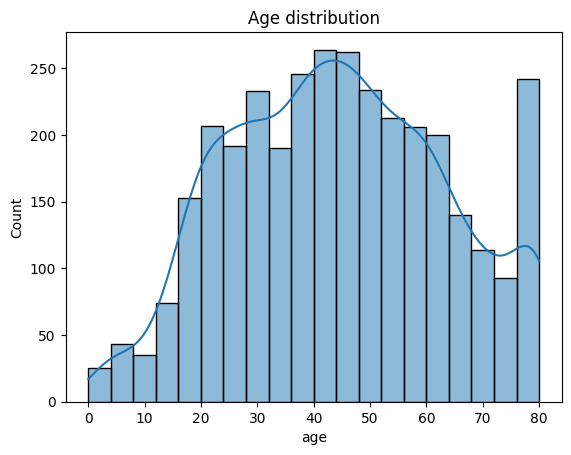

In [35]:
sns.histplot(df['age'],kde = True)
plt.title('Age distribution')
plt.show()

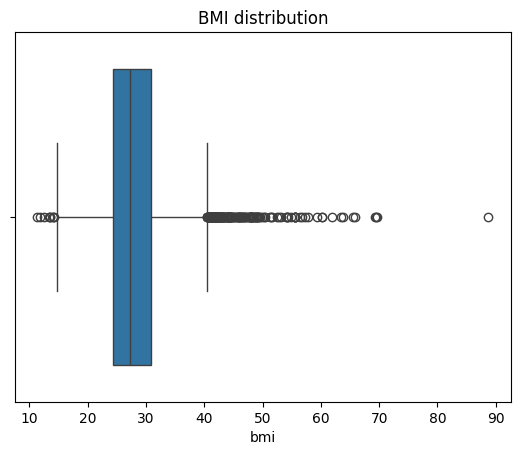

In [36]:
sns.boxplot(x = 'bmi',data = df)
plt.title('BMI distribution')
plt.show()

In [37]:
import numpy as np

In [38]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

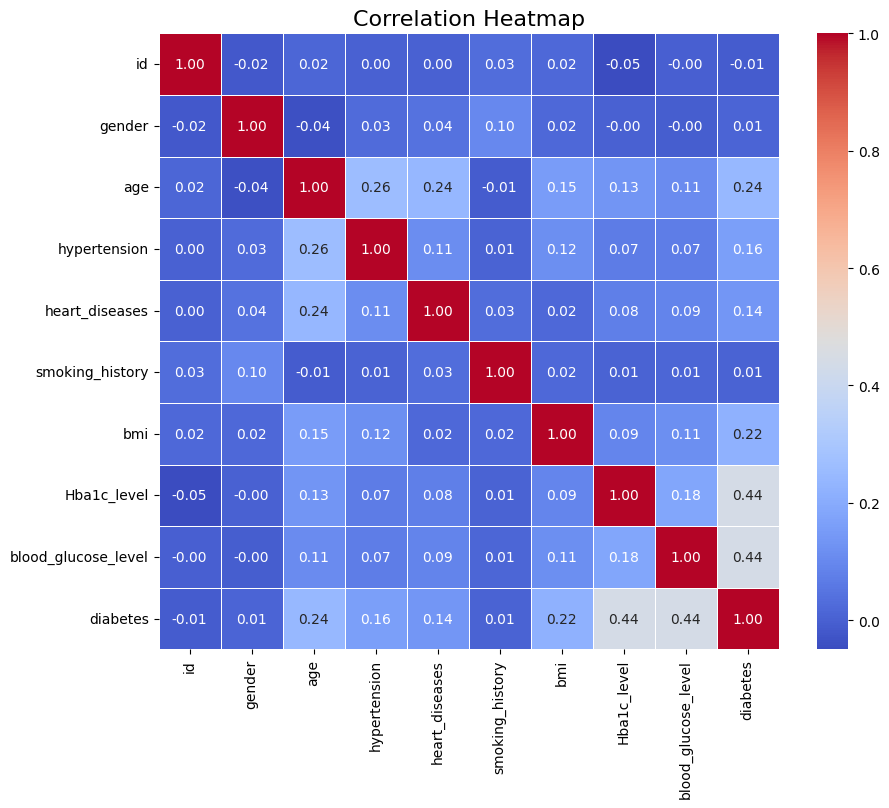

In [39]:
plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Machine Learning - Predict Diabetes

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
X = df[['age', 'gender', 'bmi', 'blood_glucose_level', 'smoking_history']]
y = df['diabetes']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9183976261127597
